In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read dataset from the csv file
filename = "E:\\Work\\FinalProjectData\\unsupervised_data.csv"
dataset  = read_csv(filename)

# Removing the unwanted attributed which does not contribute to the analysis
dataset.pop('name')
dataset.pop('phoneNumber')
dataset.pop('address')

# LabelEncoder to transform the string data to integer
le = LabelEncoder()
for col in dataset.columns:
    if col == 'city':
        le.fit(dataset[col])
        dataset[col] = le.transform(dataset[col])


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['city', 'age', 'calls', 'activeCalls', 'sms', 'data', 'subscription_a', 
            'subscription_b', 'subscription_c', 'subscription_d']
# Separating out the features
#x = dataset.loc[:, features].values
x = dataset.loc[:, ['age']].values
# Separating out the target
y = dataset.loc[:,['plan']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(x)
y_kmeans = kmeans.predict(x)


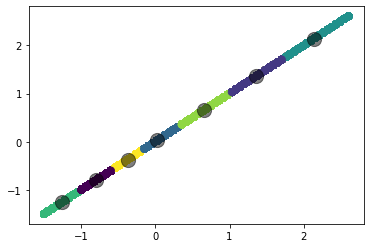

In [4]:
plt.scatter(x[:, 0], x[:, 0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=0.5);